# Tensor Flow Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.
- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/


In [41]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import matplotlib        as mpl
rng = numpy.random

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['text.usetex'    ] = True
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

In [42]:
# Parameters
learning_rate   = 0.01
training_epochs = 20000
display_step    = 1000

In [43]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [44]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [45]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [46]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [47]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 1000 cost= 0.082216099 W= 0.209457 b= 1.09021
Epoch: 2000 cost= 0.077452958 W= 0.237818 b= 0.886179
Epoch: 3000 cost= 0.077034175 W= 0.246139 b= 0.826315
Epoch: 4000 cost= 0.076995559 W= 0.248581 b= 0.808749
Epoch: 5000 cost= 0.076991476 W= 0.249298 b= 0.803594
Epoch: 6000 cost= 0.076990917 W= 0.249508 b= 0.802081
Epoch: 7000 cost= 0.076990806 W= 0.249564 b= 0.801676
Epoch: 8000 cost= 0.076990753 W= 0.249589 b= 0.801499
Epoch: 9000 cost= 0.076990761 W= 0.249598 b= 0.801434
Epoch: 10000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 11000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 12000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 13000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 14000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 15000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 16000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 17000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 18000 cost= 0.076990739 W= 0.249607 b= 0.801368
Epoch: 19000 cost= 0

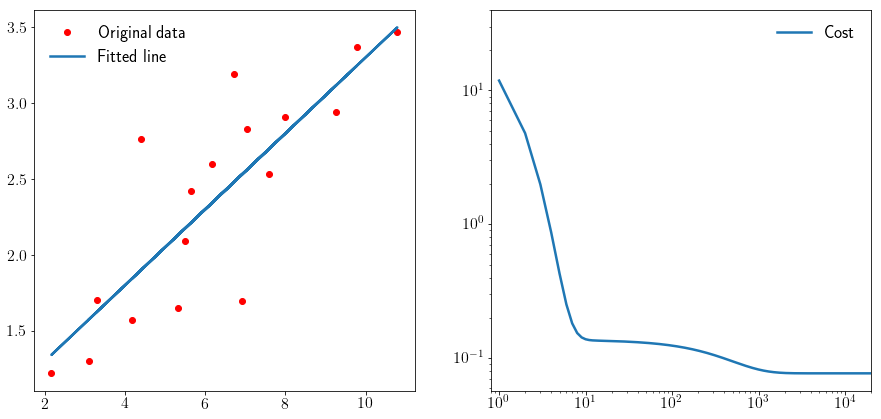

In [48]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    
    cost_array = []
    W1000 = tf.Variable(rng.randn(), name="weight1000")
    b1000 = tf.Variable(rng.randn(), name="bias1000")
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        # store the cost at each iteration to plot it
        cost_array.append( sess.run(cost, feed_dict={X: train_X, Y:train_Y}) )
        
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
        #if (epoch+1==1000):
        #    W1000=sess.run(W)
        #    b1000=sess.run(b)
        
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    #Graphic display
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    #plt.plot(train_X, sess.run(W1000) * train_X + sess.run(b1000), label='N_{epoch}=1000', color='orange')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(cost_array,label='Cost')
    plt.xlim(0.8,training_epochs)
    plt.loglog()
    plt.legend()

    plt.show()

Current question on this example: how to select the parameter at an intermediate step of the minimization, let say for $N_{epoch}=1000$? I tried with the following code but it failed:

Outside the loop:
```python
W1000 = tf.Variable(rng.randn(), name="weight1000")
b1000 = tf.Variable(rng.randn(), name="bias1000")
```
Then in the loop:
```python
if (epoch+1==1000):
    W1000=sess.run(W)
    b1000=sess.run(b)
```